In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import datetime
from tqdm import tqdm
from matplotlib import pyplot as plt

params = {"font.size" : 15}
plt.rcParams.update(params)
plt.style.use('dark_background')

## Download Data

In [2]:
# Data Directory
data_dir = '/workspace/202205_idx-trading/_data/'
lq45_dir = '/workspace/202205_idx-trading/_data/20220525_lq45/'
lq45_list = '20220525_lq45-list.txt'
issi_list = '20220525_issi-list.txt'

# Prepare Stock Tickers
with open(data_dir + lq45_list, "r") as f:
    lq45_tickers = f.read().split('\n')

with open(data_dir + issi_list, "r") as f:
    issi_tickers = f.read().split('\n')

## Prepare tickers for international codes
lq45_tickers_international = [f + '.JK' for f in lq45_tickers]
issi_tickers_international = [f + '.JK' for f in issi_tickers]

In [3]:
# Parameters
interval = '1d'
period = 'max'

# Getting data for stocks
lq45_data = yf.download(lq45_tickers_international, 
                   interval=interval,
                   period=period,
                   threads=True,
                   group_by='ticker')

[*********************100%***********************]  45 of 45 completed


In [6]:
# Display Data
lq45_data['ADRO.JK'].tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-05-30,3170.0,3180.0,3030.0,3060.0,3060.0,146193800.0
2022-05-31,3130.0,3290.0,3100.0,3270.0,3270.0,286452200.0
2022-06-02,3260.0,3350.0,3200.0,3330.0,3330.0,185774500.0
2022-06-03,3330.0,3570.0,3280.0,3520.0,3520.0,258029000.0
2022-06-06,3520.0,3590.0,3440.0,3460.0,3460.0,128510900.0


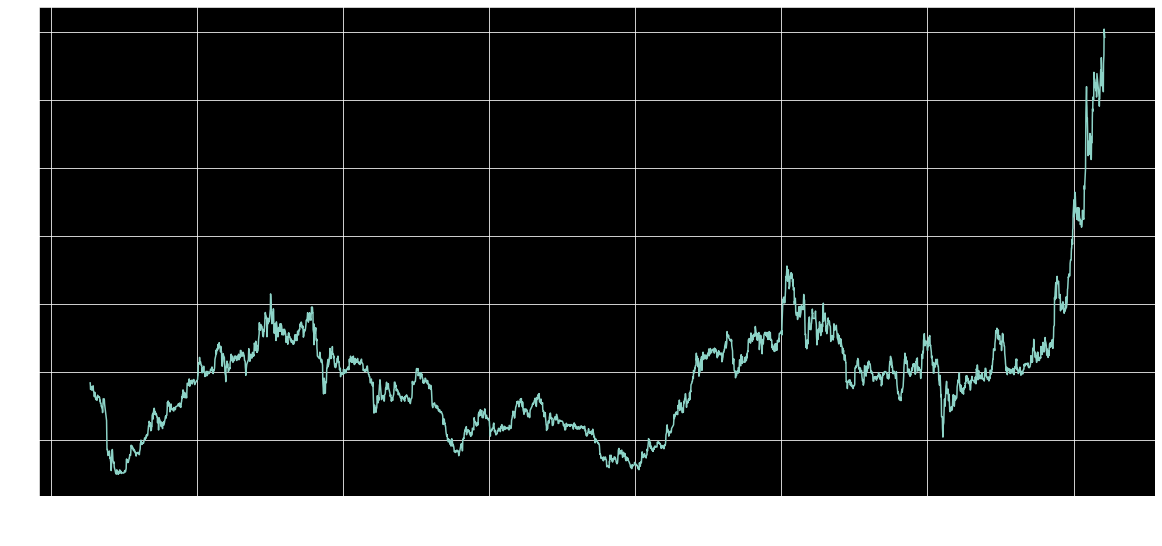

Last Date: 2022-06-06 00:00:00


In [4]:
# Visualize Closing Prices
lq45_data['ADRO.JK']['Adj Close'].plot(grid=True, figsize=(20,10))
plt.show()
print('Last Date: ' + str(lq45_data['ADRO.JK'].index[-1]))

In [7]:
# Save in csv
for ticker in tqdm(lq45_tickers_international):
    lq45_data[ticker].to_csv(lq45_dir + ticker + '.csv')

100%|███████████████████████████████████████████| 45/45 [00:02<00:00, 20.09it/s]


In [8]:
# Getting data for LQ45 Index
lq45_index_data = yf.download('^JKLQ45',
                            interval=interval,
                            period=period,
                            threads=True,
                            group_by='ticker')

[*********************100%***********************]  1 of 1 completed


In [9]:
# Save in CSV
lq45_index_data.to_csv(data_dir + '20220525_lq45_index' + '.csv')